#                              **VISUALISATIONS**          
For further insights into merged dataset with the aid of different plots       

In [1]:
# import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

In [2]:
#load merged_dataset onto this notebook
df_merged = pd.read_csv('merged_dataset.csv')
df_merged.head()

,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


# Scatter Plot; 
to show if there is a strong correlation between the estimated cases and incidence

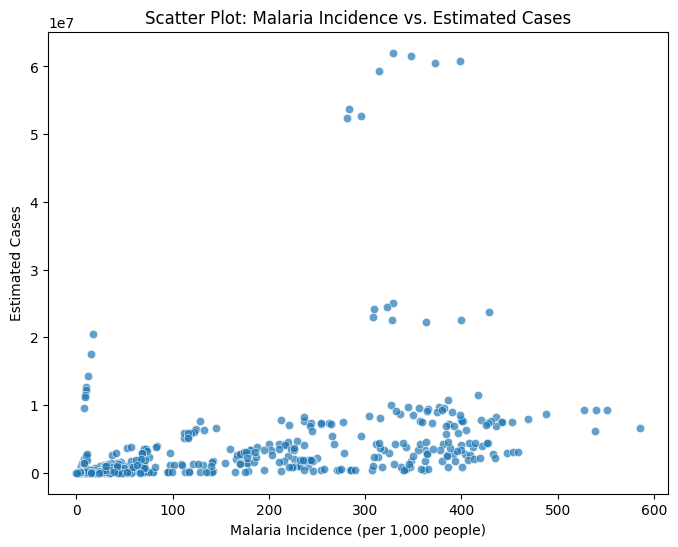

In [3]:
# Scatter Plot: Incidence vs. Estimated Cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged['Malaria Incidence'], y=df_merged['No. of cases_median'], alpha=0.7)
plt.xlabel("Malaria Incidence (per 1,000 people)")
plt.ylabel("Estimated Cases")
plt.title("Scatter Plot: Malaria Incidence vs. Estimated Cases")
plt.show()

# Box Plot 
using the WHO Region to check for outliers(under eporting)

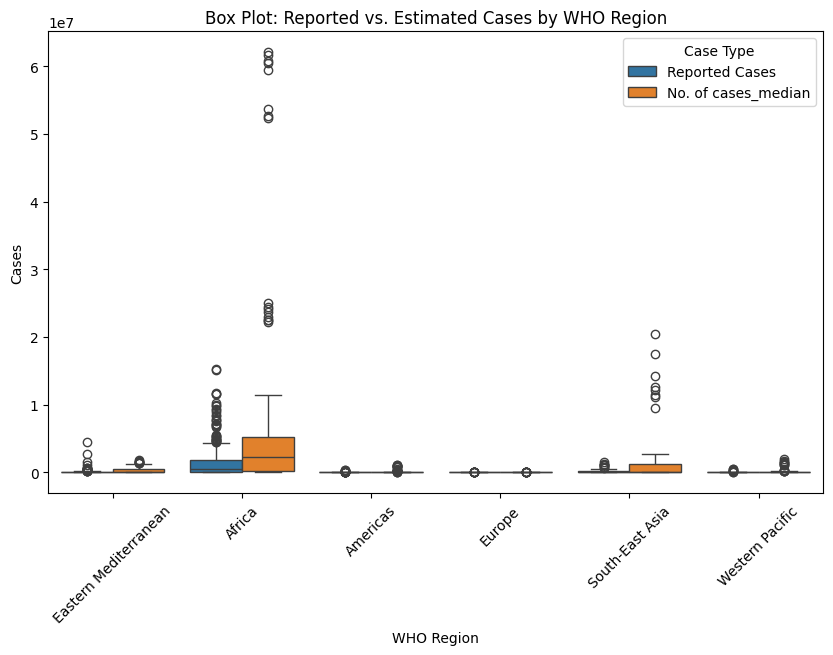

In [4]:
# Box Plot: Reported vs. Estimated Cases by WHO Region ----
plt.figure(figsize=(10, 6))
melted_data = df_merged.melt(id_vars=['WHO Region'], value_vars=['Reported Cases', 'No. of cases_median'],
                             var_name='Case Type', value_name='Cases')
sns.boxplot(x='WHO Region', y='Cases', hue='Case Type', data=melted_data)
plt.xticks(rotation=45)
plt.title("Box Plot: Reported vs. Estimated Cases by WHO Region")
plt.legend(title="Case Type")
plt.show()